In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns

In [4]:
ds = pd.read_csv('/Users/adityakumar/Desktop/titanic.csv')
ds.info()
#sns.heatmap(ds.corr())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
ds.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
col_to_drop=['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked']

df=ds.drop(col_to_drop, axis=1)
df.head()
#sns.heatmap(df.corr())

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [7]:
def convert_sex_to_num(s):
    if s=='male':
        return 0
    elif s=='female':
        return 1
    else:
        return s
df.Sex=df.Sex.map(convert_sex_to_num)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


In [8]:
data=df.dropna()
data.describe()
#data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,0.406162,2.236695,0.365546,29.699118,0.512605,0.431373,34.694514
std,0.491460,0.838250,0.481921,14.526497,0.929783,0.853289,52.918930
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,20.125000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,0.000000,28.000000,0.000000,0.000000,15.741700
75%,1.000000,3.000000,1.000000,38.000000,1.000000,1.000000,33.375000
max,1.000000,3.000000,1.000000,80.000000,5.000000,6.000000,512.329200


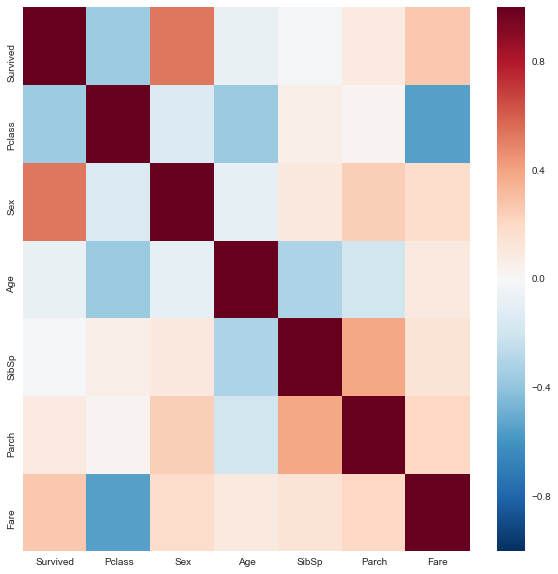

In [9]:
plt.figure(0, figsize=(10, 10))
sns.heatmap(data.corr())

In [10]:
x_col=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
y_col=['Survived']
x=data[x_col]
y=data[y_col]
print(x.shape, y.shape)

(714, 6) (714, 1)


In [11]:
data=data.reset_index(drop=True)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


In [10]:
data.loc[2]

Survived     1.000
Pclass       3.000
Sex          1.000
Age         26.000
SibSp        0.000
Parch        0.000
Fare         7.925
Name: 2, dtype: float64

# Decision Trees


In [11]:
def divide_data(xdata, fkey, fval):
    xright=pd.DataFrame([], columns=xdata.columns)
    xleft=pd.DataFrame([], columns=xdata.columns)
    for ix in range(xdata.shape[0]):
        val=xdata[fkey].loc[ix]
        if val>fval:
            xright=xright.append(xdata.loc[ix])#what is the difference between this line and just 
                                          #xright.append(xdata.loc[ix]) because on using without equal to
        else:
            xleft=xleft.append(xdata.loc[ix])#the output of next cell coming -1000 for all
    return xleft, xright


def entropy(col):
    counts = np.unique(col, return_counts=True)
    N=float(col.shape[0])
    ent=0
    for ix in range(counts[1].shape[0]):
        p=counts[1][ix]/N
        ent+=(-1*p*np.log2(p))
    return ent


def information_gain(xdata, fkey, fval):
    left, right=divide_data(xdata, fkey, fval)
    P=float(left.shape[0])/xdata.shape[0]
    Q=float(right.shape[0])/xdata.shape[0]
    if left.shape[0]==0 or right.shape[0]==0:
        return -1000
    
    
    return entropy(xdata.Survived)-(P*entropy(left.Survived)+Q*entropy(right.Survived))

In [12]:
for fx in x.columns:
    print(fx, information_gain(data, fx, data[fx].mean())) 
    

Pclass 0.0841581440715109
Sex 0.21601606075154256
Age 2.6666107433293007e-08
SibSp 0.006904127996153919
Parch 0.019278172321014586
Fare 0.05371958996365245


In [13]:
class Decision_Tree:
    def __init__(self, depth=0, maxdepth=5):
        self.right=None
        self.left=None
        self.depth=depth
        self.maxdepth=maxdepth
        self.fkey=None
        self.fval=None
        self.target=None
        
        
    def train(self, xtrain):
        print(self.depth,'-'*20)
        features=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
        gain=[]
        for fx in features:
            gain.append(information_gain(xtrain, fx, xtrain[fx].mean()))
        
        
        self.fkey=features[np.argmax(gain)]
        self.fval=xtrain[self.fkey].mean()
        
        
        data_left, data_right=divide_data(xtrain, self.fkey, self.fval)
        data_left=data_left.reset_index(drop=True)
        data_right=data_right.reset_index(drop=True)
        
        
        if data_left.shape[0]==0 or data_right.shape[0]==0:
            if xtrain.Survived.mean()>0.5:
                self.target="Survived"
            else:
                self.target="Dead"
                
            return
        
        if self.depth>=self.maxdepth:
            if xtrain.Survived.mean()>0.5:
                self.target='Survived'
            else:
                self.target='Dead'
            return
        
        
        self.right=Decision_Tree(depth=self.depth+1, maxdepth=self.maxdepth)
        self.right.train(data_right)
        
        self.left=Decision_Tree(depth=self.depth+1, maxdepth=self.maxdepth)
        self.left.train(data_left)
        
        if xtrain.Survived.mean() >= 0.5:
            self.target = 'Survived'
        else:
            self.target = 'Dead'
        
        return
    
    
     
    def predict(self, test):
        if test[self.fkey] > self.fval:
            # go right
            if self.right is None:
                return self.target
            return self.right.predict(test)
        else:
            # go left
            if self.left is None:
                return self.target
            return self.left.predict(test)
        
    
    

In [15]:
split = int(0.8 * data.shape[0])

training_data = data[:split]
testing_data = data[split:]

In [15]:
dt = Decision_Tree()
dt.train(training_data)

0 --------------------
1 --------------------
2 --------------------
3 --------------------
4 --------------------
5 --------------------
5 --------------------
4 --------------------
5 --------------------
5 --------------------
3 --------------------
4 --------------------
5 --------------------
5 --------------------
4 --------------------
5 --------------------
5 --------------------
2 --------------------
3 --------------------
4 --------------------
5 --------------------
5 --------------------
4 --------------------
5 --------------------
5 --------------------
3 --------------------
4 --------------------
5 --------------------
5 --------------------
4 --------------------
5 --------------------
5 --------------------
1 --------------------
2 --------------------
3 --------------------
4 --------------------
5 --------------------
5 --------------------
4 --------------------
5 --------------------
5 --------------------
3 --------------------
4 --------------------
5 ---------

In [16]:
print(dt.fkey, dt.fval)
print(dt.right.fkey, dt.right.fval)

Sex 0.36777583187390545
Pclass 2.080952380952381


In [17]:
for ix in testing_data.index[:10]:
    print(dt.predict(testing_data.loc[ix]))

Dead
Survived
Dead
Dead
Dead
Survived
Dead
Survived
Dead
Dead


In [18]:
testing_data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
571,0,3,0,33.0,0,0,7.7750
572,1,2,1,6.0,0,1,33.0000
573,0,3,0,17.0,1,0,7.0542
574,0,2,0,34.0,0,0,13.0000
575,0,2,0,50.0,0,0,13.0000
576,1,1,0,27.0,1,0,53.1000
577,0,3,0,20.0,0,0,8.6625
578,1,2,1,30.0,3,0,21.0000
579,0,2,0,25.0,1,0,26.0000
580,0,3,1,25.0,1,0,7.9250


Decision Tree and Random Forests using sklearn

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [16]:
ds = DecisionTreeClassifier()
ds.fit(x[:split], y[:split])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [ ]:
ds = DecisionTreeClassifier

In [ ]:
ds = DecisionTreeClassifier

In [2]:
ds = DecisionTreeClassifier

NameError: name 'DecisionTreeClassifier' is not defined

In [21]:
ds.score(x[split:], y[split:])

0.7832167832167832

In [24]:
rf=RandomForestClassifier(n_estimators=100)
rf.fit(x[:split], y[:split])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [25]:
rf.score(x[split:], y[split:])

0.8671328671328671